# Ford GoBike System Data
## by Aya Hamdy

## Preliminary Wrangling

> Ford GoBike System Dateset is a dateset that includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area through 2019. This data avaliable at https://s3.amazonaws.com/baywheels-data/index.html.

> here i am focuse on all 2019 year months.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import calendar
%matplotlib inline

In [5]:
#load data for different months and concatnat them into one csv file
df = pd.concat(map(pd.read_csv, glob.glob('DataSet/*.csv')))
df.head()

/home/aya/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/aya/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/aya/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,707,2019-11-30 23:54:47.2970,2019-12-01 00:06:34.3780,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,12077,Customer,No,NaN
1,2649,2019-11-30 23:18:36.2890,2019-12-01 00:02:45.5790,440.0,Carl St at Cole St,37.765910,-122.449257,13.0,Commercial St at Montgomery St,37.794231,-122.402923,10322,Subscriber,Yes,NaN
2,1711,2019-11-30 23:33:02.2610,2019-12-01 00:01:34.2170,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,180.0,Telegraph Ave at 23rd St,37.812678,-122.268773,476,Subscriber,No,NaN
3,931,2019-11-30 23:45:20.2720,2019-12-01 00:00:51.9560,323.0,Broadway at Kearny,37.798014,-122.405950,78.0,Folsom St at 9th St,37.773717,-122.411647,12370,Subscriber,No,NaN
4,1449,2019-11-30 23:29:56.6710,2019-11-30 23:54:05.8620,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,107,Customer,No,NaN


In [6]:
#dataset shape
df.shape

(2506983, 15)

In [7]:
#dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506983 entries, 0 to 256298
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
dtypes: float64(6), int64(2), object(7)
memory usage: 306.0+ MB


## Data Cleaning

In [8]:
#convert time to timestamp
df['start_time']=pd.to_datetime(df['start_time'])
df['end_time']=pd.to_datetime(df['end_time'])

In [9]:
#check null values
df.isnull().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id             80734
start_station_name           80133
start_station_latitude           0
start_station_longitude          0
end_station_id               82902
end_station_name             82350
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip     243259
rental_access_method       2386145
dtype: int64

#### My analysis will focuse on trip duration and it's time such as months and days, so i will drop the rest of columns

In [10]:
#drop null columns with the columns which i will not use it in analysis
df.drop(['start_station_id','end_station_id','start_station_name','end_station_name','start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude','bike_share_for_all_trip','rental_access_method'], axis=1, inplace=True)
df.head()

,duration_sec,start_time,end_time,bike_id,user_type
0,707,2019-11-30 23:54:47.297,2019-12-01 00:06:34.378,12077,Customer
1,2649,2019-11-30 23:18:36.289,2019-12-01 00:02:45.579,10322,Subscriber
2,1711,2019-11-30 23:33:02.261,2019-12-01 00:01:34.217,476,Subscriber
3,931,2019-11-30 23:45:20.272,2019-12-01 00:00:51.956,12370,Subscriber
4,1449,2019-11-30 23:29:56.671,2019-11-30 23:54:05.862,107,Customer


In [11]:
#extract days,months,time from time and convert it to it's actually value for future analysis
df['month'] = pd.DatetimeIndex(df['start_time']).month
df['day'] = pd.DatetimeIndex(df['start_time']).dayofweek
df['hour'] = df['start_time'].dt.strftime('%H:%M')
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])
df['day'] = df['day'].apply(lambda x: calendar.day_name[x])

In [14]:
#convert time to mintues to be easly in analysis
df["duration_min"] = round((df.duration_sec/60), 2)

In [15]:
#save updates to csv file
df.to_csv('2019_Tripdata.csv',index=False)
df=pd.read_csv('2019_Tripdata.csv')
df.head()

,duration_sec,start_time,end_time,bike_id,user_type,month,day,hour,duration_min
0,707,2019-11-30 23:54:47.297,2019-12-01 00:06:34.378,12077,Customer,Nov,Saturday,23:54,11.78
1,2649,2019-11-30 23:18:36.289,2019-12-01 00:02:45.579,10322,Subscriber,Nov,Saturday,23:18,44.15
2,1711,2019-11-30 23:33:02.261,2019-12-01 00:01:34.217,476,Subscriber,Nov,Saturday,23:33,28.52
3,931,2019-11-30 23:45:20.272,2019-12-01 00:00:51.956,12370,Subscriber,Nov,Saturday,23:45,15.52
4,1449,2019-11-30 23:29:56.671,2019-11-30 23:54:05.862,107,Customer,Nov,Saturday,23:29,24.15


### What is the structure of your dataset?

Data contains 2,506,983 bike rides in the San Francisco Bay Area (2019).The dataset contained features about: 

- Trip duration: trip duration in seconds, start/end date/time for the bike rides. 

- Stations info: start/end station, name, geolocation (latitude/longitude) 

- Customer info: type of member (user_type)

- Bike id

- Bike Share for all Trip

-  Rental access method

### What is/are the main feature(s) of interest in your dataset?

- When are most trips taken in  month of the year?
- How long does the average trip take?
- Does the above depend on if a user is a subscriber or customer?


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Trip duration, Trip time (months) and User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

Text(0.5, 0, 'duration_min')

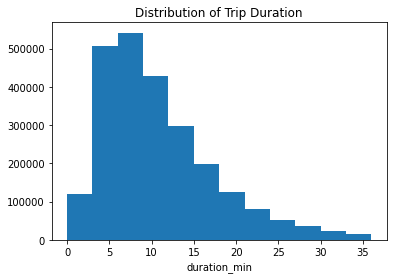

In [32]:
#How long does the average trip take?
bin_edges = np.arange(0, 36 + 3 , 3)
plt.hist(data = df, x = 'duration_min' , bins = bin_edges)
plt.title('Distribution of Trip Duration')
plt.xlabel('duration_min')

> It is right screwed with a long tail on the right. let try log transformation to x axis.

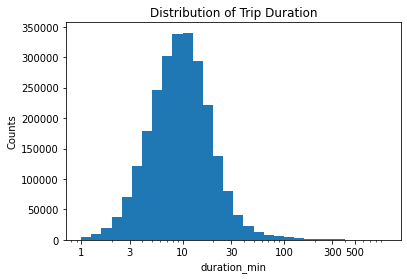

In [34]:
#try log 
ticks =  [ 1 , 3, 10, 30, 100, 300, 500]
labels = ['{}'.format(v) for v in ticks]
bins = 10**np.arange(0 , 3 + 0.1 , 0.1)
plt.hist(data = df, x = 'duration_min' , bins = bins);
plt.xscale('log');
plt.xticks(ticks,labels);
plt.xlabel('duration_min');
plt.title('Distribution of Trip Duration')
plt.ylabel('Counts');

The plot show that the majority of trips takes around 10 mins

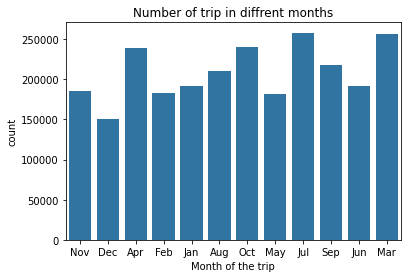

In [35]:
#When are most trips taken in month of the year? let's analysis trips through the year months
sb.countplot(data=df, x='month', color=sb.color_palette()[0]);
plt.xlabel('Month of the trip')
plt.title('Number of trip in diffrent months');

The number of trips during winter is less and it makes sense as it's cold weather and increases during warm months.

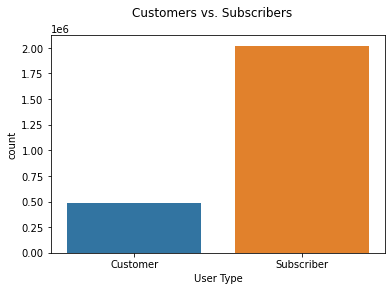

In [39]:
# the count of trips against user type
graph = sb.countplot(data = df, x = "user_type");
graph.set_xlabel('User Type');
graph.set_ylabel('count');
plt.suptitle('Customers vs. Subscribers');

Text(0.5, 1.05, 'Type of users')

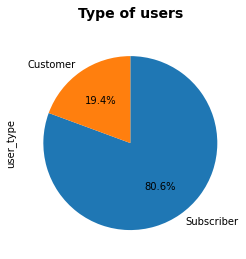

In [45]:
df.user_type.value_counts().plot(kind='pie',autopct = '%1.1f%%',startangle = 90,
        counterclock = False,);
plt.title("Type of users", y=1.05, fontsize=14, fontweight='semibold')

The majority of users are subscribers and it's make sense as they are using the service frequently. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>  Most of the trips take around 10 mins and months with frequent rides are warm months such as July. Subscribers of the service seem to use the service of bike rides more than the Customers.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I converted the start and end time for DateTime to be able to extract months from it and also converted the duration from seconds to minutes to be easly understood.

## Bivariate Exploration

Text(0.5, 1.05, 'total user counts as per user type and month')

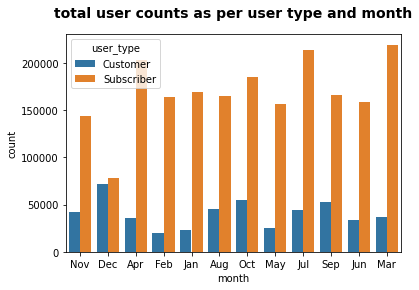

In [40]:
#Lets check types of users according to months
#It can be seen that the number of customers are high during dec, sept and oct, while subscribers is high during mar, apr and july.
sb.countplot(data = df, x = 'month', hue = 'user_type')
plt.title("total user counts as per user type and month", y=1.05, fontsize=14, fontweight='semibold')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> As can be seen cyclist who are subscribed user have higher number of trips than the customers specially during warm time. The highest peack in March and july for subscribe while surprisingly the highest peak for customer in Dec ( almost equal subscriber).

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Customer user in Dec higher than subscriber.

## Multivariate Exploration

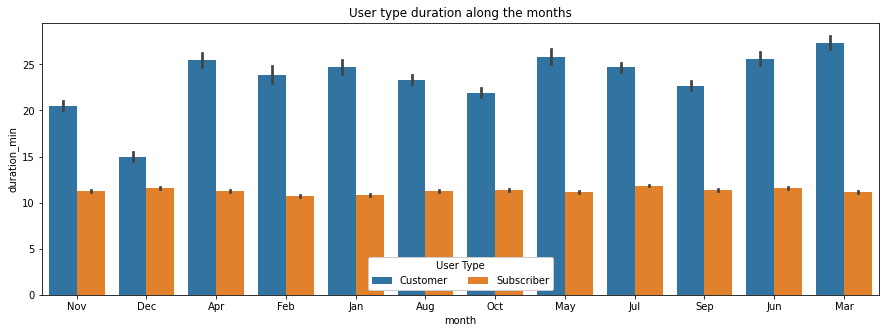

In [48]:
plt.figure(figsize = [15, 5])
ax = sb.barplot(data = df, x = 'month', y = 'duration_min', hue = 'user_type')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'User Type');
plt.title('User type duration along the months');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I tried to invistiagte the relation between the duration against month and user type through the year. customer users are using the bikes for longer period of time. However,the subscribed customers trips are shorter and consistant.

### Were there any interesting or surprising interactions between features?

> How customer spend more time than the subscribers.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!